In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\Priti_Modi\Files\insurance.csv')


In [109]:
#Quick overview of the DataFrame's column names, data types, and the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [112]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [113]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [114]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
encoder_df = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)

In [117]:
# encoder_df = pd.concat([df,encoder_df],axis=1)

In [118]:
df1 = df.merge(encoder_df, how='inner')

In [119]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [120]:
df1.drop(['sex', 'smoker','region'], axis=1,inplace=True)

In [121]:
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1335,50,30.970,3,10600.54830,1,0,1,0,0
1336,18,31.920,0,2205.98080,0,0,0,0,0
1337,18,36.850,0,1629.83350,0,0,0,1,0
1338,21,25.800,0,2007.94500,0,0,0,0,1


In [122]:
df1['sex_male'].unique()

array([0, 1], dtype=uint8)

In [123]:
df1['smoker_yes'].unique()

array([1, 0], dtype=uint8)

In [124]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109129  0.044324  0.300401 -0.022929   
bmi               0.109129  1.000000  0.012767  0.198222  0.046320   
children          0.044324  0.012767  1.000000  0.069211  0.015800   
charges           0.300401  0.198222  0.069211  1.000000  0.055794   
sex_male         -0.022929  0.046320  0.015800  0.055794  1.000000   
smoker_yes       -0.023888  0.003759  0.008355  0.787286  0.075366   
region_northwest -0.004182 -0.135712  0.022346 -0.042309 -0.008522   
region_southeast -0.010310  0.269960 -0.022217  0.074786  0.016198   
region_southwest  0.011213 -0.006194  0.022662 -0.042358 -0.005016   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.023888         -0.004182         -0.010310   
bmi                 0.003759         -0.135712          0.269960   
children            0.008355          0.022346         -0.022217   
charges             0.78728

<Axes: >

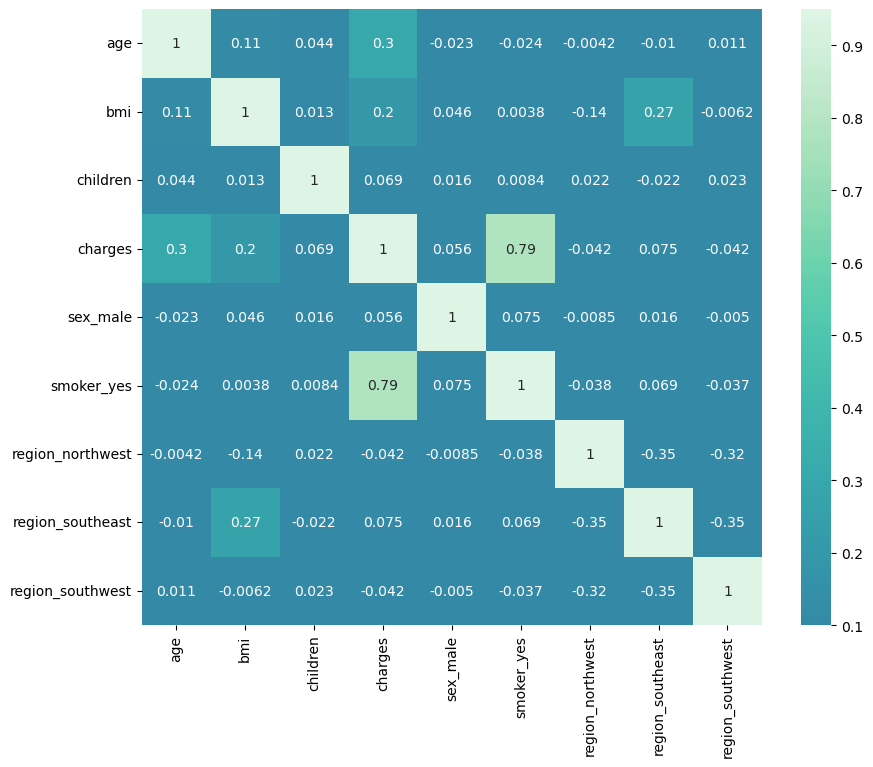

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

matrix = df1.corr()
print(matrix)
sns.heatmap(data = matrix ,annot = True,cmap = 'mako',center = 0 ,vmin = 0.1, vmax = 0.95)

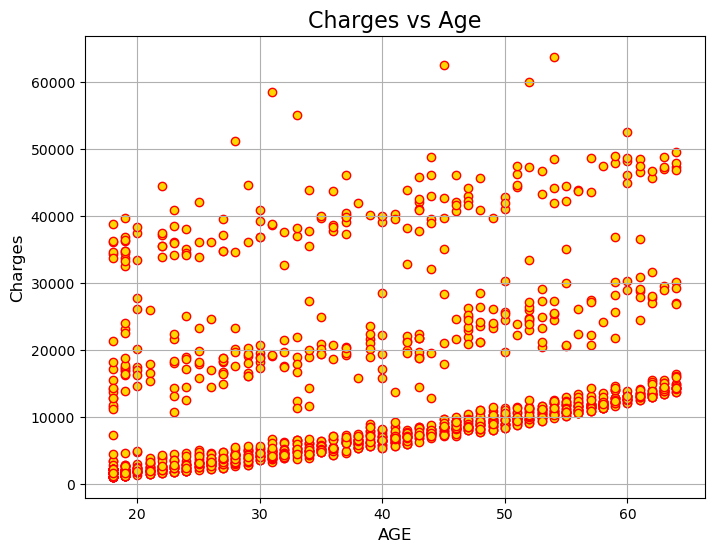

In [126]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(df1['age'], df1['charges'], color='gold', edgecolors='red')
plt.title('Charges vs Age', fontsize=16)
plt.xlabel('AGE', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.show()

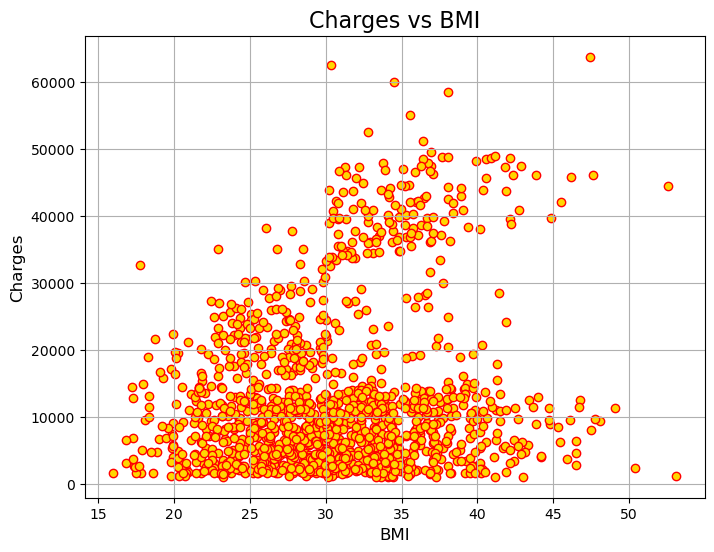

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['bmi'], df1['charges'], color='gold', edgecolors='red')
plt.title('Charges vs BMI', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.show()

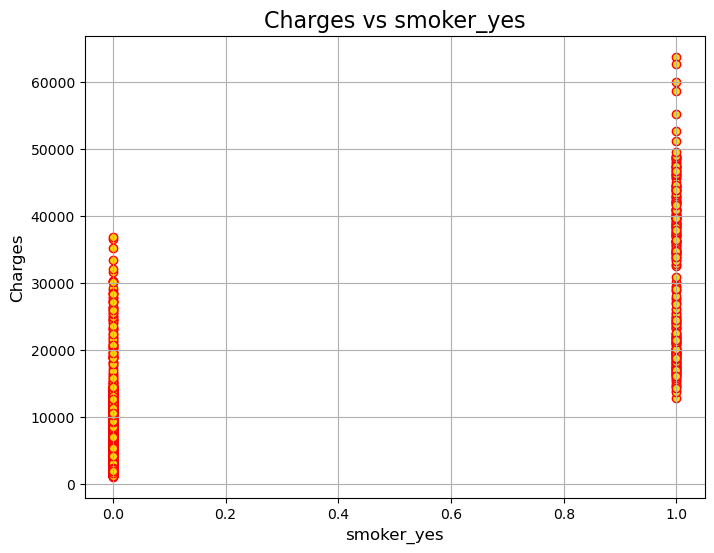

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['smoker_yes'], df1['charges'], color='gold', edgecolors='red')
plt.title('Charges vs smoker_yes', fontsize=16)
plt.xlabel('smoker_yes', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.show()

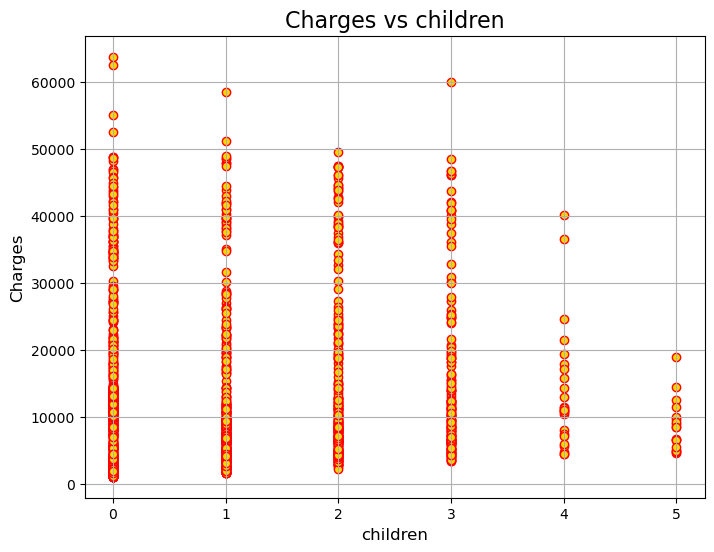

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['children'], df1['charges'], color='gold', edgecolors='red')
plt.title('Charges vs children', fontsize=16)
plt.xlabel('children', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.show()

In [130]:
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1335,50,30.970,3,10600.54830,1,0,1,0,0
1336,18,31.920,0,2205.98080,0,0,0,0,0
1337,18,36.850,0,1629.83350,0,0,0,1,0
1338,21,25.800,0,2007.94500,0,0,0,0,1


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

X = df1.drop(['charges'],axis =1)
y=df1['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [132]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1148,60,32.800,0,1,1,0,0,1
807,45,35.815,0,0,0,1,0,0
1287,47,24.320,0,0,0,0,0,0
590,61,35.910,0,0,0,0,0,0
1188,20,35.625,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...
1095,22,30.400,0,0,1,1,0,0
1130,34,32.800,1,1,0,0,0,1
1294,21,23.210,0,1,0,0,1,0
860,25,32.230,1,0,0,0,1,0


In [133]:
y_train

1148    52590.82939
807      7731.85785
1287     8534.67180
590     13635.63790
1188    37465.34375
           ...     
1095    33907.54800
1130    14358.36437
1294     1515.34490
860     18218.16139
1126    40904.19950
Name: charges, Length: 1072, dtype: float64

In [134]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8107193110150538


In [135]:
y_pred = regr.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y_test, y_pred, squared=False)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 3974.3765565305425
MSE: 30470225.83636474
RMSE: 5519.984224285858


In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [142]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

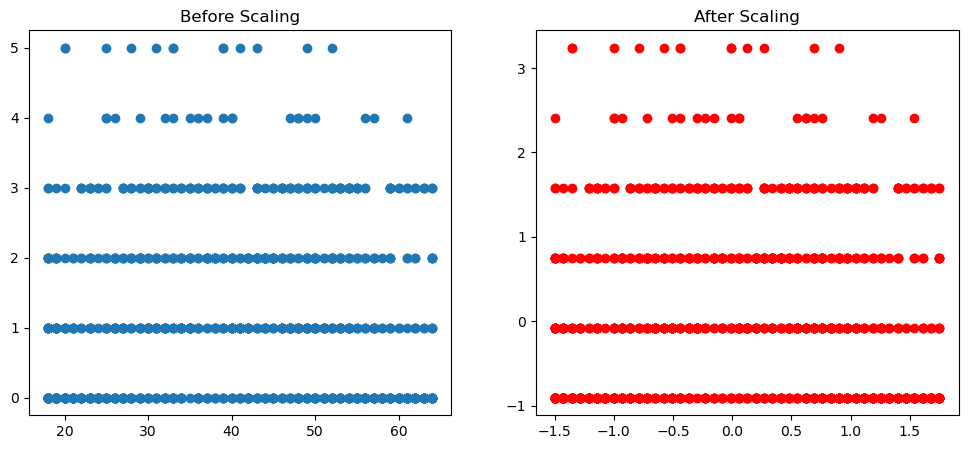

In [144]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['age'], X_train['children'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['age'], X_train_scaled['children'],color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='age', ylabel='Density'>

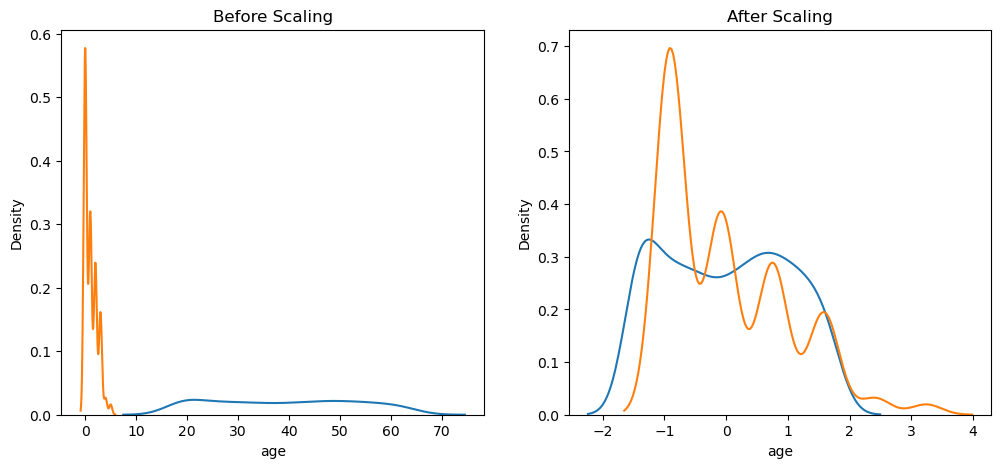

In [145]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)
sns.kdeplot(X_train['children'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['children'], ax=ax2)

In [147]:
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)
print(regr.score(X_test_scaled, y_test))

0.8107193110150539
